In [9]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import pandas as pd
import json
import numpy as np

from src.functions import plot_pokeball_means
from src.functions import plot_heavy, plot_fast, plot_ultra
from src.functions import plot_status, plot_life

In [10]:
if __name__ == "__main__":
    factory = PokemonFactory("pokemon.json")

    # Open the JSON file
    with open('pokemon.json', 'r') as file:
        # Load JSON data
        data = json.load(file)

    pokemon_names = list(data.keys())
    pokemons = []
    for pokemon in pokemon_names:
        pokemons.append(factory.create(pokemon, 100, StatusEffect.NONE, 1))


In [11]:
    pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

    stats_df = pd.DataFrame(0.0, index=pokemons, columns=pokeballs)
    error_df = pd.DataFrame(0.0, index=pokemons, columns=pokeballs)
    


In [12]:
    iterations = 100
    for pokeball in pokeballs:
        accuracies = []
        for pokemon in pokemons:
            for _ in range(iterations):
                catched = int(attempt_catch(pokemon, pokeball)[0])
                catched = catched / iterations
                stats_df.at[pokemon,
                            pokeball] += catched
                accuracies.append(catched)
            error_df.at[pokemon,
                        pokeball] = np.std(accuracies)

    print(stats_df)
    # Remove all pokemons that were never catched
    error_df = error_df[~(stats_df == 0).any(axis=1)]
    stats_df = stats_df[~(stats_df == 0).any(axis=1)]

                                                pokeball  ultraball  fastball  \
<src.pokemon.Pokemon object at 0x7e1e3bdc7908>      0.03       0.12      0.05   
<src.pokemon.Pokemon object at 0x7e1e3bdc6940>      0.05       0.10      0.01   
<src.pokemon.Pokemon object at 0x7e1e3bdc5978>      0.02       0.14      0.10   
<src.pokemon.Pokemon object at 0x7e1e3bdc99b0>      0.06       0.13      0.06   
<src.pokemon.Pokemon object at 0x7e1e3bdc99e8>      0.05       0.12      0.10   
...                                                  ...        ...       ...   
<src.pokemon.Pokemon object at 0x7e1e3bdf07b8>      0.03       0.10      0.01   
<src.pokemon.Pokemon object at 0x7e1e3bdf07f0>      0.01       0.10      0.16   
<src.pokemon.Pokemon object at 0x7e1e3bdf0828>      0.00       0.00      0.01   
<src.pokemon.Pokemon object at 0x7e1e3bdf0860>      0.01       0.01      0.01   
<src.pokemon.Pokemon object at 0x7e1e3bdf0898>      0.00       0.00      0.00   

                           

{'pokeball': 0.1415041783, 'ultraball': 0.2824373259, 'fastball': 0.1696657382, 'heavyball': 0.1178412256}


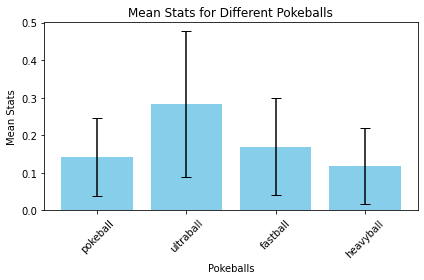

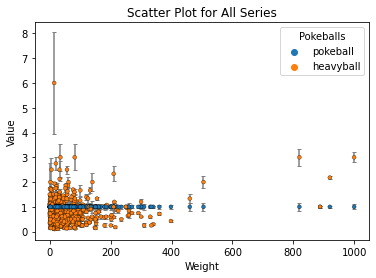

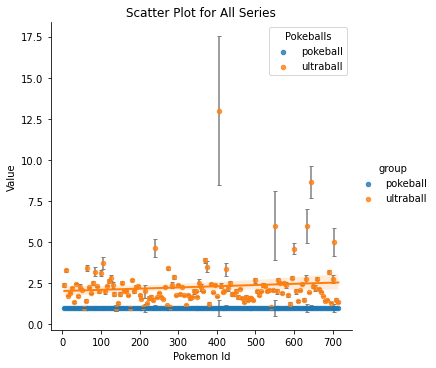

,name,pokeball,status,accuracy,error
0,pikachu,pokeball,POISON,0.36961,0.014586
1,pikachu,ultraball,POISON,0.74441,0.012968
2,pikachu,fastball,POISON,0.37341,0.015772
3,pikachu,heavyball,POISON,0.33061,0.015172
4,pikachu,pokeball,BURN,0.37117,0.015732
5,pikachu,ultraball,BURN,0.74275,0.012101
6,pikachu,fastball,BURN,0.37140,0.014820
7,pikachu,heavyball,BURN,0.33309,0.013736
8,pikachu,pokeball,PARALYSIS,0.37036,0.014382
9,pikachu,ultraball,PARALYSIS,0.74078,0.013216


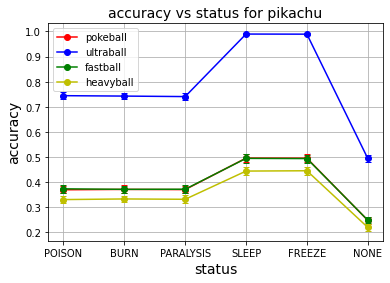

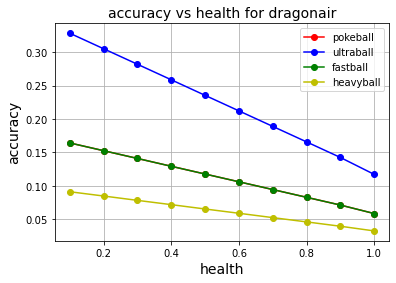

In [13]:
    plot_pokeball_means(pokeballs, pokemons, stats_df)
    plot_heavy(pokeballs, stats_df, error_df)
    plot_ultra(pokeballs, stats_df, error_df)
    plot_status(factory, pokeballs, "pikachu")
    plot_life(factory, pokeballs, "dragonair")